<a href="https://colab.research.google.com/github/Pradnya1208/Books-summary-extraction-and-sentiment-analysis/blob/main/model%20building/Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests

import string
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import warnings
warnings.filterwarnings('ignore')

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


--2022-03-27 13:57:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-27 13:57:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-27 13:57:49--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [42]:
!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-03-27 14:21:50--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.88.13
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.88.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  45.2MB/s    in 35s     

2022-03-27 14:22:26 (44.5 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go

#import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'

print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.8.0


In [3]:
model_data = pd.read_csv("/content/model_data.csv")
model_data.head()

,title,summary,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment_class
0,The Hunger Games,"Could you survive on your own in the wild, wit...",8,8,10,9,6,16,11,11,5,5,Negative
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,14,7,5,15,6,18,18,13,5,10,Neutral
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,2,4,2,5,8,8,15,5,1,2,Positive
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,5,15,2,3,22,8,26,0,3,15,Positive
4,The Book Thief,Librarian's note: An alternate cover edition c...,3,5,3,7,3,9,11,4,4,11,Positive


In [4]:
model_data.describe()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000
mean,4.802583,7.273063,3.440037,7.455720,6.680812,10.226937,15.158672,5.087638,3.691882,8.296125
std,4.180568,4.835920,3.160102,5.472577,4.949567,6.611929,8.652238,4.011373,2.938126,5.396379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,1.000000,3.000000,3.000000,5.000000,9.000000,2.000000,2.000000,4.000000
50%,4.000000,7.000000,3.000000,6.000000,6.000000,9.000000,14.000000,4.000000,3.000000,8.000000
75%,7.000000,10.000000,5.000000,11.000000,9.000000,14.000000,20.000000,7.000000,5.000000,11.000000
max,25.000000,46.000000,21.000000,31.000000,35.000000,39.000000,86.000000,25.000000,20.000000,58.000000


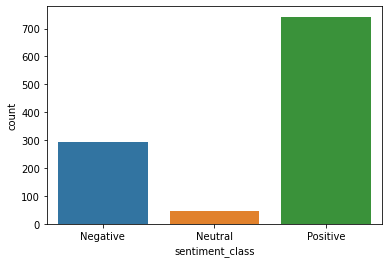

In [5]:
sns.countplot(x = 'sentiment_class', data = model_data)

Our data is imbalanced

In [6]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
df_summary = model_data[["title","summary", "sentiment_class"]]

## Multiclass text classification

In [29]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

# Naive Bayes Classifier for Multinomial Models

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
X = df_summary.summary
y = df_summary.sentiment_class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)



nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=["Positive", "Negative", "Neutral"]))

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

accuracy 0.6748466257668712
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        96
    Negative       0.00      0.00      0.00        10
     Neutral       0.67      1.00      0.81       220

    accuracy                           0.67       326
   macro avg       0.22      0.33      0.27       326
weighted avg       0.46      0.67      0.54       326



In [35]:
my_tags = ["Positive", "Negative", "Neutral"]

# Linear Support Vector Machine

In [38]:

from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

accuracy 0.7239263803680982
              precision    recall  f1-score   support

    Positive       0.74      0.26      0.38        96
    Negative       0.00      0.00      0.00        10
     Neutral       0.72      0.96      0.82       220

    accuracy                           0.72       326
   macro avg       0.49      0.41      0.40       326
weighted avg       0.70      0.72      0.67       326



# Logistic Regression

In [40]:

from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)



y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

accuracy 0.7331288343558282
              precision    recall  f1-score   support

    Positive       0.71      0.31      0.43        96
    Negative       0.00      0.00      0.00        10
     Neutral       0.74      0.95      0.83       220

    accuracy                           0.73       326
   macro avg       0.48      0.42      0.42       326
weighted avg       0.71      0.73      0.69       326



# Word2vec and Logistic Regression

In [43]:
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("/content/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [44]:

def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [49]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df_summary, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['summary']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['summary']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['sentiment_class'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.sentiment_class))
print(classification_report(test.sentiment_class, y_pred,target_names=my_tags))

accuracy 0.7239263803680982
              precision    recall  f1-score   support

    Positive       0.60      0.58      0.59        96
    Negative       0.00      0.00      0.00        10
     Neutral       0.82      0.82      0.82       220

    accuracy                           0.72       326
   macro avg       0.47      0.47      0.47       326
weighted avg       0.73      0.72      0.73       326



# Doc2vec and Logistic Regression

In [57]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
#from gensim.models.doc2vec import TaggedDocument
import re

from gensim.models import Doc2Vec
import gensim
from gensim.models.doc2vec import TaggedDocument

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(df_summary.summary, df_summary.sentiment_class, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [58]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 1084/1084 [00:00<00:00, 1182785.00it/s]


In [59]:

def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [60]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

LogisticRegression(C=100000.0, n_jobs=1)

accuracy 0.6809815950920245
              precision    recall  f1-score   support

    Positive       0.57      0.53      0.55        92
    Negative       0.05      0.07      0.06        15
     Neutral       0.79      0.79      0.79       219

    accuracy                           0.68       326
   macro avg       0.47      0.46      0.46       326
weighted avg       0.69      0.68      0.69       326



# Deep learning

In [74]:

import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df_summary) * .7)
train_posts = df_summary['summary'][:train_size]
train_tags = df_summary['sentiment_class'][:train_size]

test_posts = df_summary['summary'][train_size:]
test_tags = df_summary['sentiment_class'][train_size:]

max_words = 15000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 32




LabelEncoder()

In [95]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/10
22/22 [==============================] - 3s 108ms/step - loss: 0.7807 - accuracy: 0.6848 - val_loss: 0.6965 - val_accuracy: 0.6711
Epoch 2/10
22/22 [==============================] - 2s 83ms/step - loss: 0.3244 - accuracy: 0.9282 - val_loss: 0.6900 - val_accuracy: 0.7105
Epoch 3/10
22/22 [==============================] - 1s 61ms/step - loss: 0.1276 - accuracy: 0.9677 - val_loss: 0.7257 - val_accuracy: 0.7368
Epoch 4/10
22/22 [==============================] - 1s 67ms/step - loss: 0.0467 - accuracy: 0.9985 - val_loss: 0.7872 - val_accuracy: 0.7368
Epoch 5/10
22/22 [==============================] - 1s 54ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.8534 - val_accuracy: 0.7237
Epoch 6/10
22/22 [==============================] - 1s 59ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.8843 - val_accuracy: 0.7237
Epoch 7/10
22/22 [==============================] - 1s 62ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.9093 - val_accuracy: 0.7368
Epoch 8/10
2

In [96]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

11/11 [==============================] - 0s 18ms/step - loss: 1.0118 - accuracy: 0.7147
Test accuracy: 0.7147239446640015
